# Loading Packages 

In [1]:
library(tidyverse)
library(ggplot2)
library(DataExplorer)
library(hrbrthemes)
library(viridis)
library(ggstatsplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

Loading required package: viridisLite

Warning message in .recacheSubclasses(def@className, def, env):
“undefined subclass "numericVector" of class "Mnumeric"; definition not updated”
You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     PsyArxiv. doi:10.31234/osf.io/p7mku



In [2]:
library(skimr)
library(Hmisc)
library(ggsci)
library(caret)
library(ggpubr)
library(gridExtra)
library(corrplot)
library(rpart)
library(rpart.plot)
library(rattle)
library(randomForest)
library(caret)
library(xgboost)
library(pscl)
library(pROC)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘caret’


The following object is masked from ‘package:survival’:

    cluster


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


corrplot 0.88 loaded

Loading required package: bitops

Registered S3 method overwritten by 'rattle':
  method         from      
  predict.kmeans parameters

Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.

randomForest 4.6-14

Type rfNews() to see

In [3]:
df <- read.csv('../input/credit-card-customers/BankChurners.csv')

# Exploring the Data

We see the basic contents of first 6 columns 

In [4]:
head(df)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,⋯,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,⋯,12691,777,11914,1.335,1144,42,1.625,0.061,9.3448e-05,0.99991
2,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,⋯,8256,864,7392,1.541,1291,33,3.714,0.105,5.6861e-05,0.99994
3,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,⋯,3418,0,3418,2.594,1887,20,2.333,0.000,2.1081e-05,0.99998
4,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,⋯,3313,2517,796,1.405,1171,20,2.333,0.760,1.3366e-04,0.99987
5,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,⋯,4716,0,4716,2.175,816,28,2.500,0.000,2.1676e-05,0.99998
6,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,⋯,4010,1247,2763,1.376,1088,24,0.846,0.311,5.5077e-05,0.99994


**Removing unnecessary columns**

In [5]:
df_clean <- df[,c(1:21)]

**We are trying to see nature of columns and so on**

In [6]:
introduce(df_clean)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
10127,21,6,15,0,0,10127,212667,1303208


Cool package which shows meta data of the columns

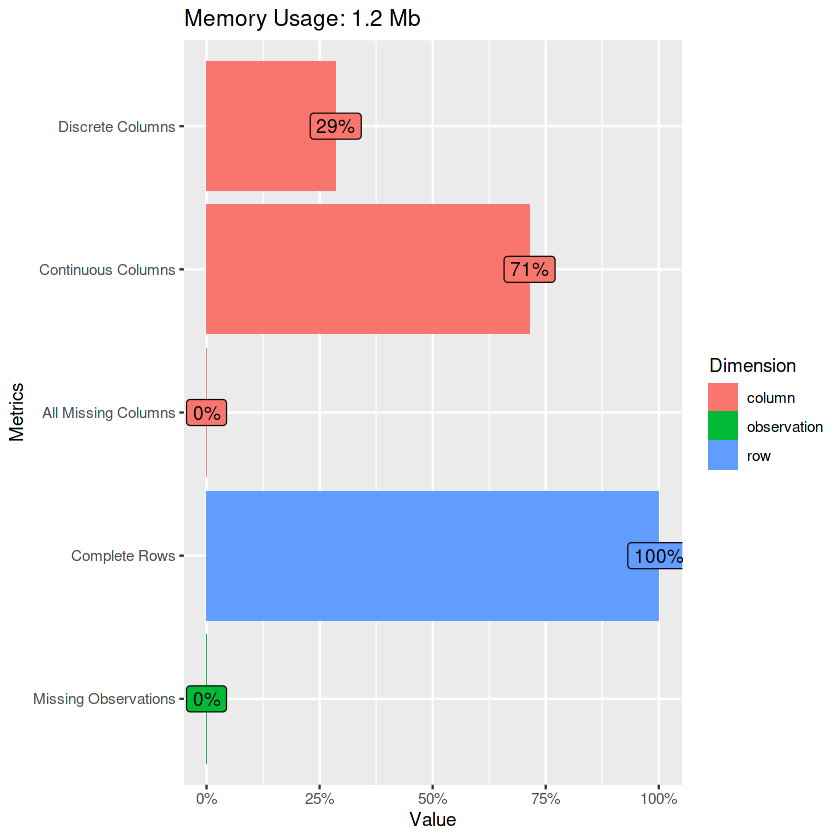

In [7]:
plot_intro(df_clean)

Plots the columns having missing values

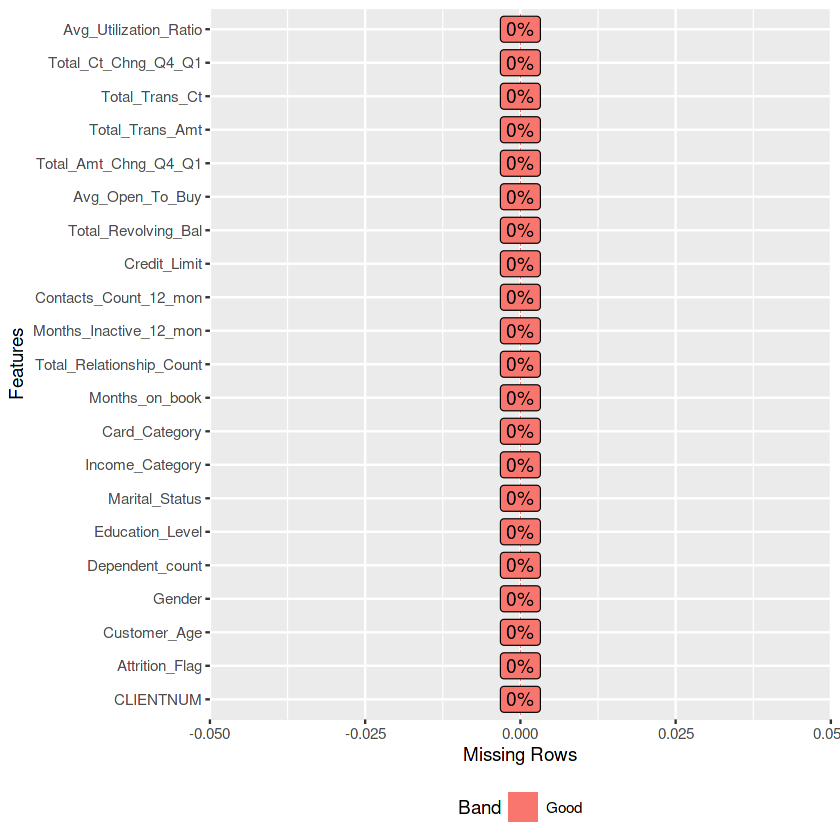

In [8]:
plot_missing(df_clean)

**Histogram distribution of age**

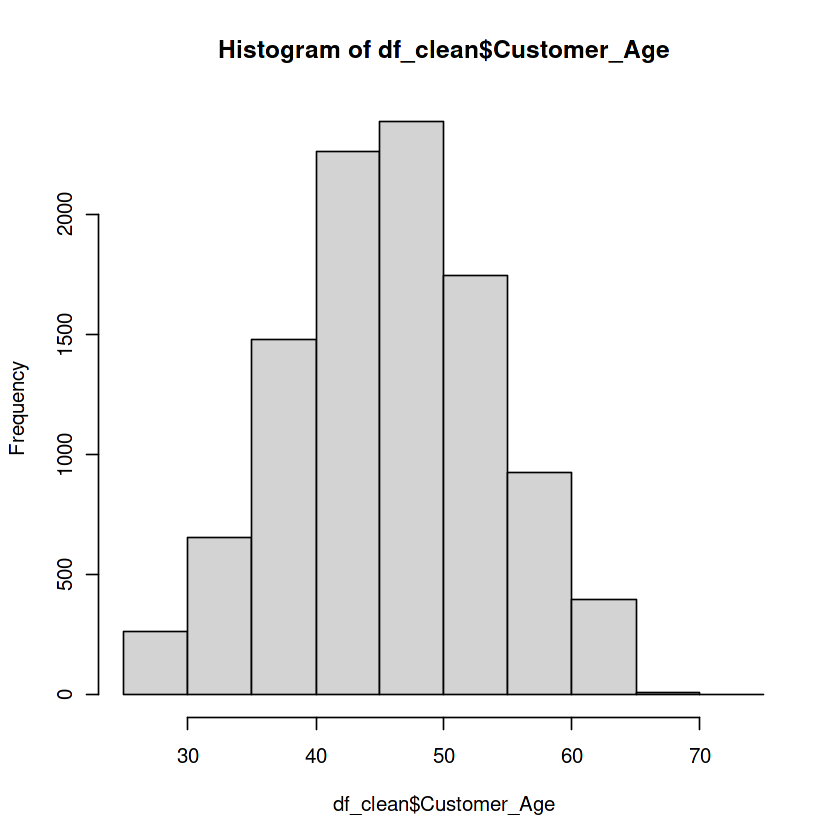

In [9]:
hist(df_clean$Customer_Age)

**Distribution of Total Revolving Balance has large proportions with low balance**

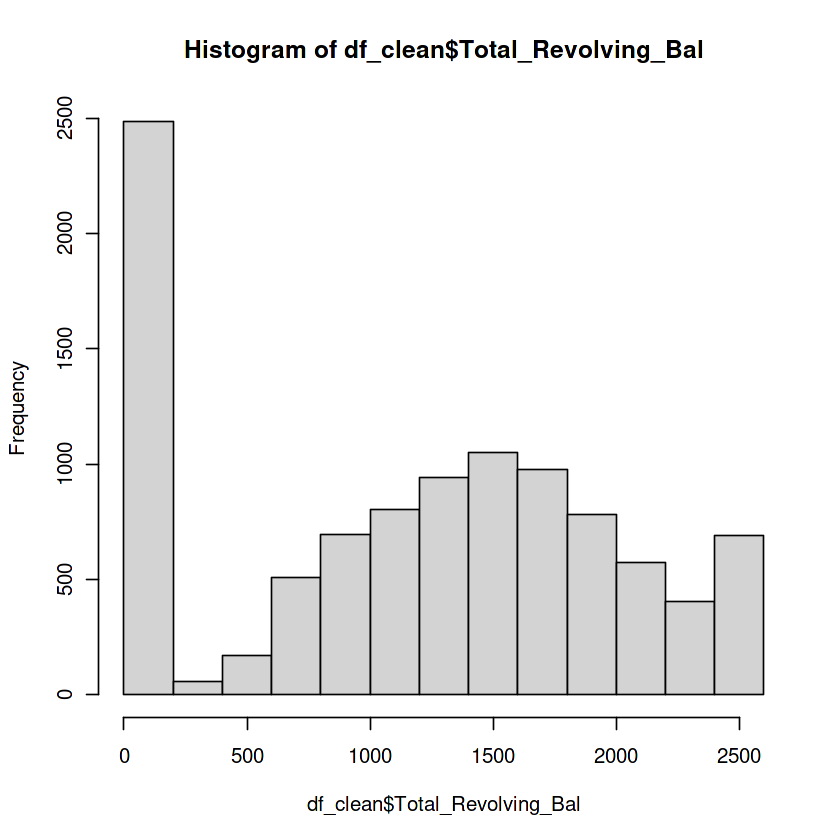

In [10]:
hist(df_clean$Total_Revolving_Bal)

**Married people have higher median age compared to others**

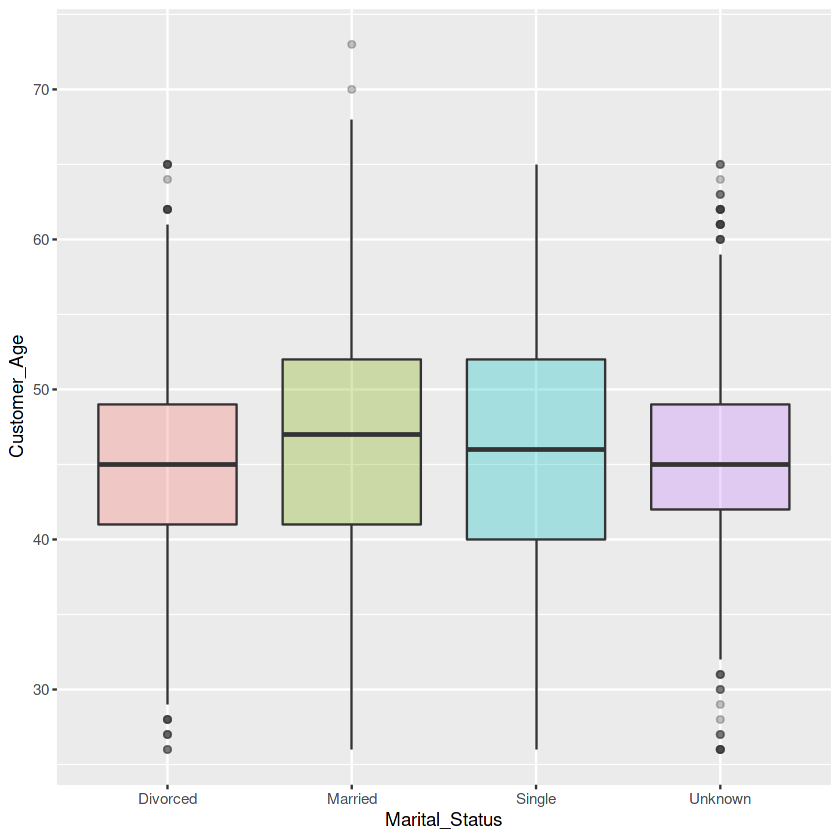

In [11]:
ggplot(df_clean, aes(x=Marital_Status, y=Customer_Age, fill=Marital_Status)) + 
    geom_boxplot(alpha=0.3) +
    theme(legend.position="none")


**Attritioned customers have higher median age which shows that it important to focus on these customers to reduce attrition****

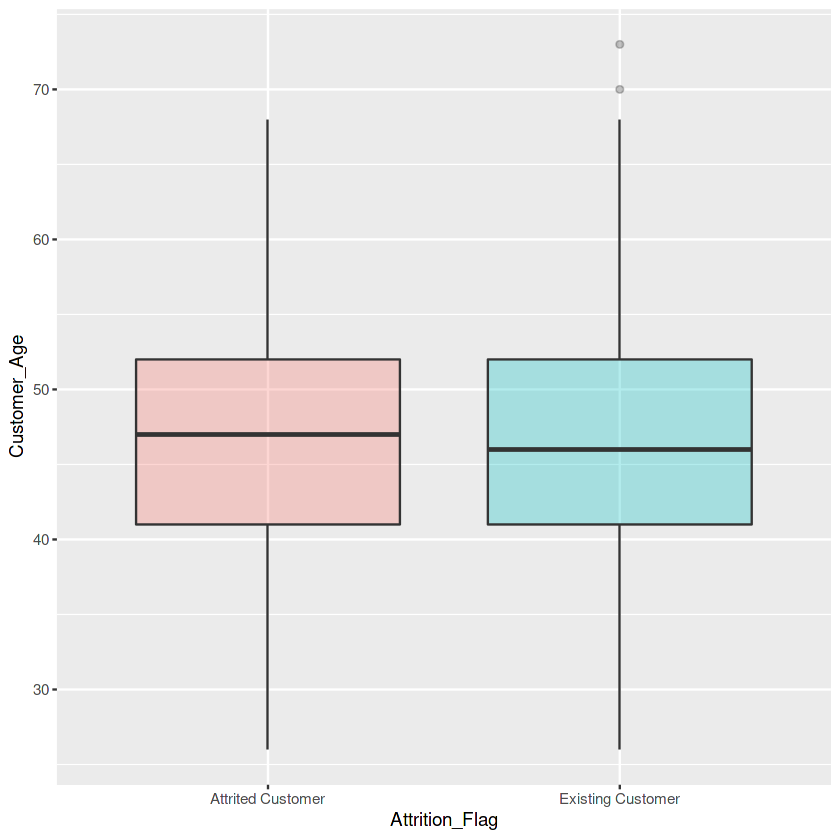

In [12]:
ggplot(df_clean, aes(x=Attrition_Flag, y=Customer_Age, fill=Attrition_Flag)) + 
    geom_boxplot(alpha=0.3) +
    theme(legend.position="none")

**Credit Limit of Attritioned and Non-Attritioned Customers seems to be almost similar**

In [13]:
plt <- ggbetweenstats(
  data = df_clean,
  x = Attrition_Flag,
  y = Credit_Limit
)

**Existing Customer has slightly higher median Credit Limit compared to Attritioned Customers**

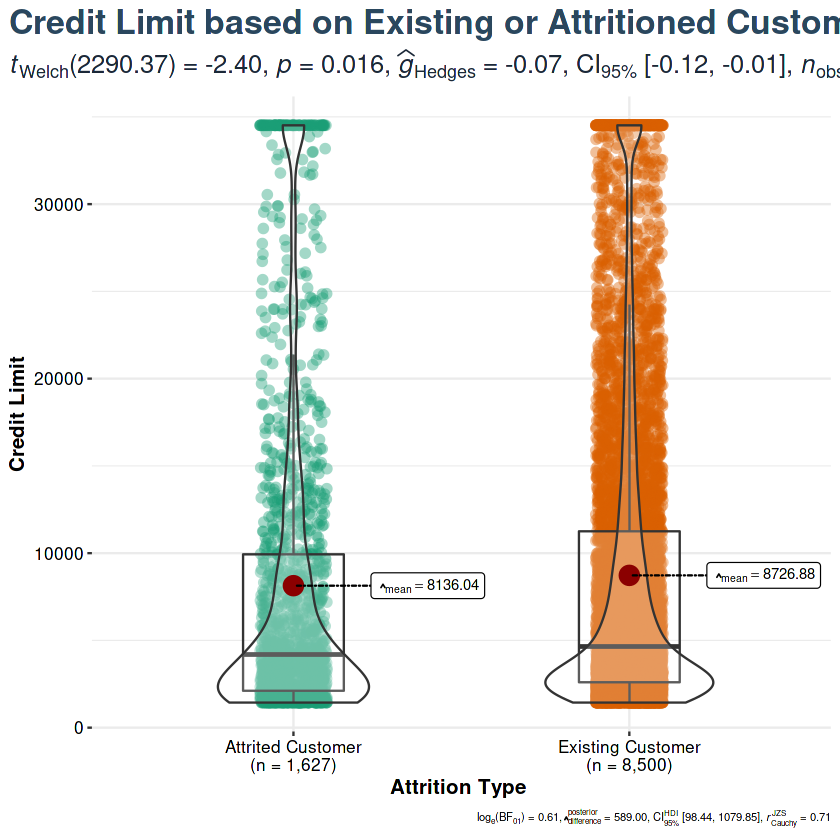

In [14]:
plt <- plt + 
  # Add labels and title
  labs(
    x = 'Attrition Type ',
    y = 'Credit Limit',
    title = "Credit Limit based on Existing or Attritioned Customer"
  ) + 
  # Customizations
  theme(
    # This is the new default font in the plot
    text = element_text(family = "Roboto", size = 8, color = "black"),
    plot.title = element_text(
      family = "Lobster Two", 
      size = 20,
      face = "bold",
      color = "#2a475e"
    ),
    # Statistical annotations below the main title
    plot.subtitle = element_text(
      family = "Roboto", 
      size = 15, 
      face = "bold",
      color="#1b2838"
    ),
    plot.title.position = "plot", # slightly different from default
    axis.text = element_text(size = 10, color = "black"),
    axis.title = element_text(size = 12)
  )

plt

Observing the nature of data

In [15]:
str(df_clean)

'data.frame':	10127 obs. of  21 variables:
 $ CLIENTNUM               : int  768805383 818770008 713982108 769911858 709106358 713061558 810347208 818906208 710930508 719661558 ...
 $ Attrition_Flag          : chr  "Existing Customer" "Existing Customer" "Existing Customer" "Existing Customer" ...
 $ Customer_Age            : int  45 49 51 40 40 44 51 32 37 48 ...
 $ Gender                  : chr  "M" "F" "M" "F" ...
 $ Dependent_count         : int  3 5 3 4 3 2 4 0 3 2 ...
 $ Education_Level         : chr  "High School" "Graduate" "Graduate" "High School" ...
 $ Marital_Status          : chr  "Married" "Single" "Married" "Unknown" ...
 $ Income_Category         : chr  "$60K - $80K" "Less than $40K" "$80K - $120K" "Less than $40K" ...
 $ Card_Category           : chr  "Blue" "Blue" "Blue" "Blue" ...
 $ Months_on_book          : int  39 44 36 34 21 36 46 27 36 36 ...
 $ Total_Relationship_Count: int  5 6 4 3 5 3 6 2 5 6 ...
 $ Months_Inactive_12_mon  : int  1 1 1 4 1 1 1 2 2 3 ...
 $ Co

We see the income category does not seem to arrange in sequential or proper order

In [16]:
df_clean$Income_Category <- factor(df_clean$Income_Category)

levels(df_clean$Income_Category)

[1] "$120K +"        "$40K - $60K"    "$60K - $80K"    "$80K - $120K"  
[5] "Less than $40K" "Unknown"

Arranging in proper order

In [17]:
df_clean$Income_Category <- factor(df_clean$Income_Category,levels(df_clean$Income_Category)[c(1,4,3,2,5,6)])
df_clean$Income_Category <- factor(df_clean$Income_Category,levels(df_clean$Income_Category)[c(6,5,4,3,2,1)])

In [18]:
plt2 <- ggbetweenstats(
  data = df_clean,
  x = Income_Category,
  y =  Customer_Age
)

**We are observing distribution of Income based on Age - highest income individuals have higher median age**

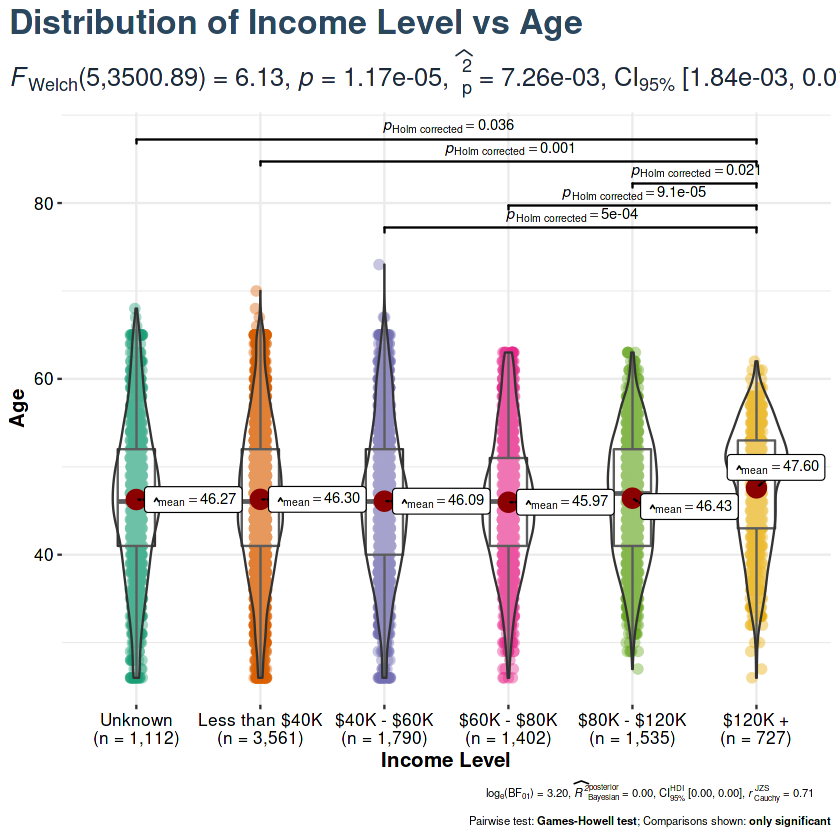

In [19]:
plt2 <- plt2 + 
  # Add labels and title
  labs(
    x = 'Income Level',
    y = 'Age',
    title = "Distribution of Income Level vs Age"
  ) + 
  # Customizations
  theme(
    # This is the new default font in the plot
    text = element_text(family = "Roboto", size = 8, color = "black"),
    plot.title = element_text(
      family = "Lobster Two", 
      size = 20,
      face = "bold",
      color = "#2a475e"
    ),
    # Statistical annotations below the main title
    plot.subtitle = element_text(
      family = "Roboto", 
      size = 15, 
      face = "bold",
      color="#1b2838"
    ),
    plot.title.position = "plot", # slightly different from default
    axis.text = element_text(size = 10, color = "black"),
    axis.title = element_text(size = 12)
  )

plt2

In [20]:
df_clean$Education_Level <- factor(df_clean$Education_Level)
levels(df_clean$Education_Level)

[1] "College"       "Doctorate"     "Graduate"      "High School"  
[5] "Post-Graduate" "Uneducated"    "Unknown"

**Arranging the Education Level in sequential order for easier interpretation**

In [21]:
df_clean$Education_Level <- factor(df_clean$Education_Level,levels(df_clean$Education_Level)[c(7,6,4,1,3,5,2)])
levels(df_clean$Education_Level)

[1] "Unknown"       "Uneducated"    "High School"   "College"      
[5] "Graduate"      "Post-Graduate" "Doctorate"

In [22]:
plt3 <- ggbetweenstats(
  data = df_clean,
  x = Education_Level,
  y = Credit_Limit
)

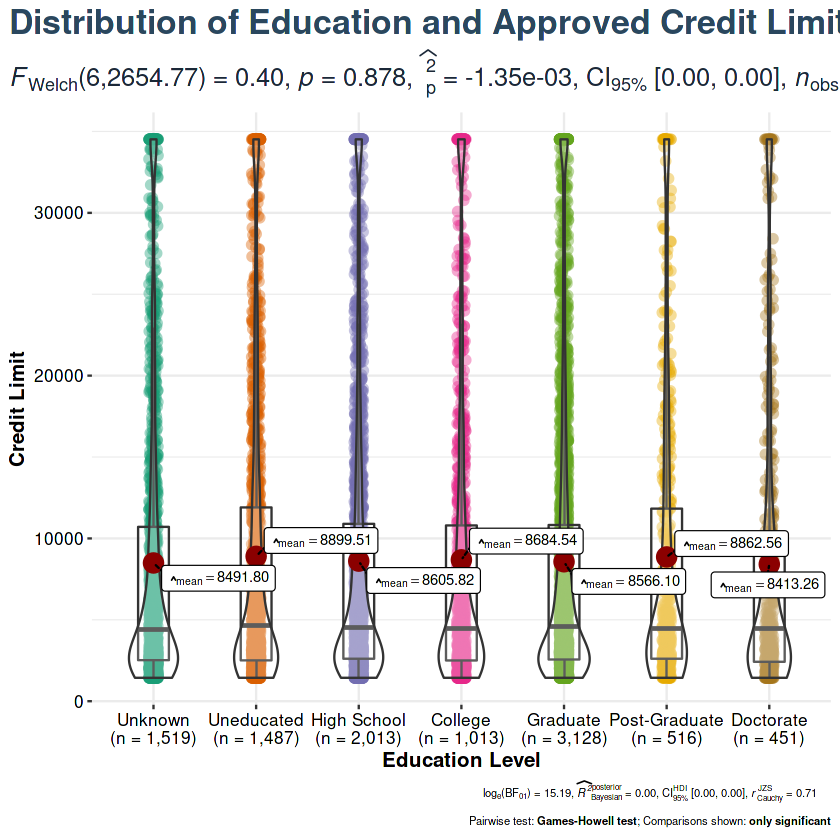

In [23]:
plt3 <- plt3 + 
  # Add labels and title
  labs(
    x = 'Education Level',
    y = 'Credit Limit',
    title = "Distribution of Education and Approved Credit Limit"
  ) + 
  # Customizations
  theme(
    # This is the new default font in the plot
    text = element_text(family = "Roboto", size = 8, color = "black"),
    plot.title = element_text(
      family = "Lobster Two", 
      size = 20,
      face = "bold",
      color = "#2a475e"
    ),
    # Statistical annotations below the main title
    plot.subtitle = element_text(
      family = "Roboto", 
      size = 15, 
      face = "bold",
      color="#1b2838"
    ),
    plot.title.position = "plot", # slightly different from default
    axis.text = element_text(size = 10, color = "black"),
    axis.title = element_text(size = 12)
  )

plt3

In [24]:
 table(df_clean$Attrition_Flag)


Attrited Customer Existing Customer 
             1627              8500 

**Converting the Attrition Flag variable where 1 denotes a customer attritioned and 0 for existing**

In [25]:
#convert target variable to numeric 
df_clean$Attrition_Flag= ifelse(df_clean$Attrition_Flag =="Attrited Customer","1","0")
df_clean$Attrition_Flag = as.factor(df_clean$Attrition_Flag)
colnames(df_clean)[2] <- 'label'

In [26]:
table(df_clean$label)


   0    1 
8500 1627 

Contacts_Count_12_mon: customers with 3 or more contacts count in the past 12 months have a higher proportion of attrition

Months_Inactive_12_mon: customers with 3 or more inactive months in the past 12 months have a higher proportion of attrition

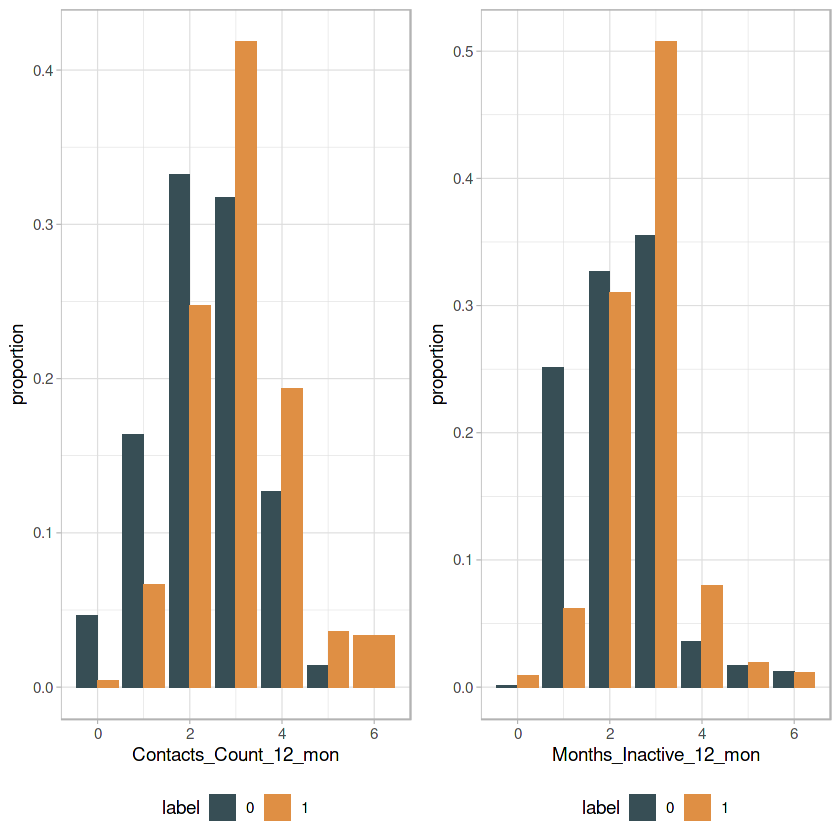

In [27]:
p1 <- df_clean %>% group_by(label,Contacts_Count_12_mon) %>% tally() %>% mutate(prop=n/sum(n)) %>% ggplot(aes(x=Contacts_Count_12_mon, y=prop,fill=label)) + geom_col(position="dodge") + scale_fill_jama() + labs(y="proportion") + theme_light() + theme(legend.position="bottom")
p2 <- df_clean %>% group_by(label,Months_Inactive_12_mon) %>% tally() %>% mutate(prop=n/sum(n)) %>% ggplot(aes(x=Months_Inactive_12_mon, y=prop,fill=label)) + geom_col(position="dodge") + scale_fill_jama() + labs(y="proportion") + theme_light() + theme(legend.position="bottom")
grid.arrange(p1,p2,ncol=2,nrow=1)



Gender: Female has a higher proportion of attrition compared to males.
Education_Level: The attrition class has a higher proportion of doctorate, post-graduate and unknown education level compared to the existing customer class.

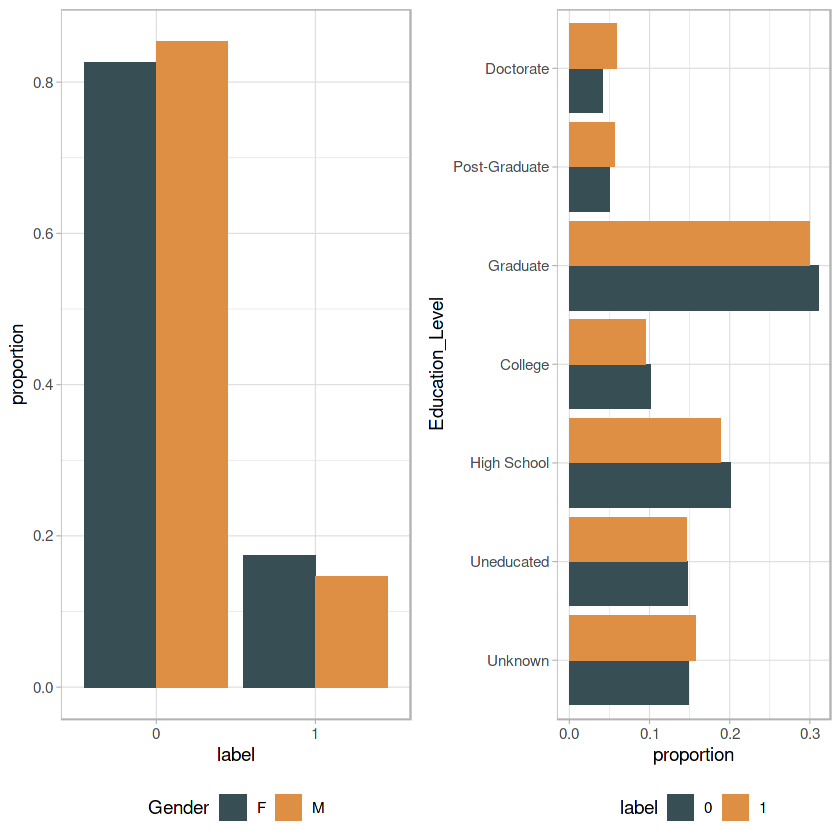

In [28]:
p5 = df_clean %>% group_by(Gender,label) %>% tally() %>% mutate(prop=n/sum(n)) %>% ggplot(aes(x=label, y=prop,fill=Gender)) + geom_col(position="dodge") + scale_fill_jama() + labs(y="proportion") + theme_light() + theme(legend.position="bottom")
p6 = df_clean %>% group_by(label,Education_Level) %>% tally() %>% mutate(prop=n/sum(n)) %>% ggplot(aes(x=Education_Level, y=prop,fill=label)) + geom_col(position="dodge") + scale_fill_jama() + labs(y="proportion") + theme_light() + theme(legend.position="bottom") + coord_flip()
grid.arrange(p5,p6,ncol=2,nrow=1)


Total_Relationship_Count: customers with 3 or less total relationship count has a higher proportion of attrition

Dependent_count: customers with 3 or more dependents have a higher proportion of attrition

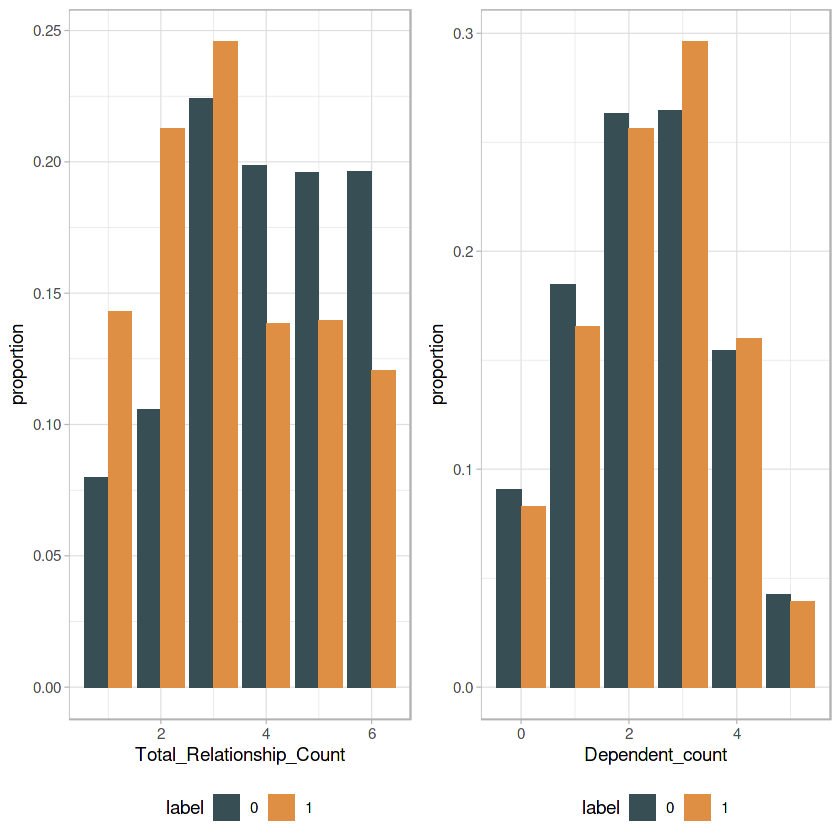

In [29]:
p3 = df_clean %>% group_by(label,Total_Relationship_Count) %>% tally() %>% mutate(prop=n/sum(n)) %>% ggplot(aes(x=Total_Relationship_Count, y=prop,fill=label)) + geom_col(position="dodge") + scale_fill_jama() + labs(y="proportion") + theme_light() + theme(legend.position="bottom") 
p4 = df_clean %>% group_by(label,Dependent_count) %>% tally() %>% mutate(prop=n/sum(n)) %>% ggplot(aes(x=Dependent_count, y=prop,fill=label)) + geom_col(position="dodge") + scale_fill_jama() + labs(y="proportion") + theme_light() + theme(legend.position="bottom")
grid.arrange(p3,p4,ncol=2,nrow=1)

* Avg_Open_To_Buy is highly correlated to Credit_Limit
* Total_Trans amount is highly correlated to Total_Trans_Amt
* Total_Amt_Chng_Q4_Q1 is correlated to Total_Ct_Cng_Q4_Q1
* Avg_Utilization_Ratio is correlated to Avg_Open_To_BUy, Total_Revolving_Bal and Credit_Limit

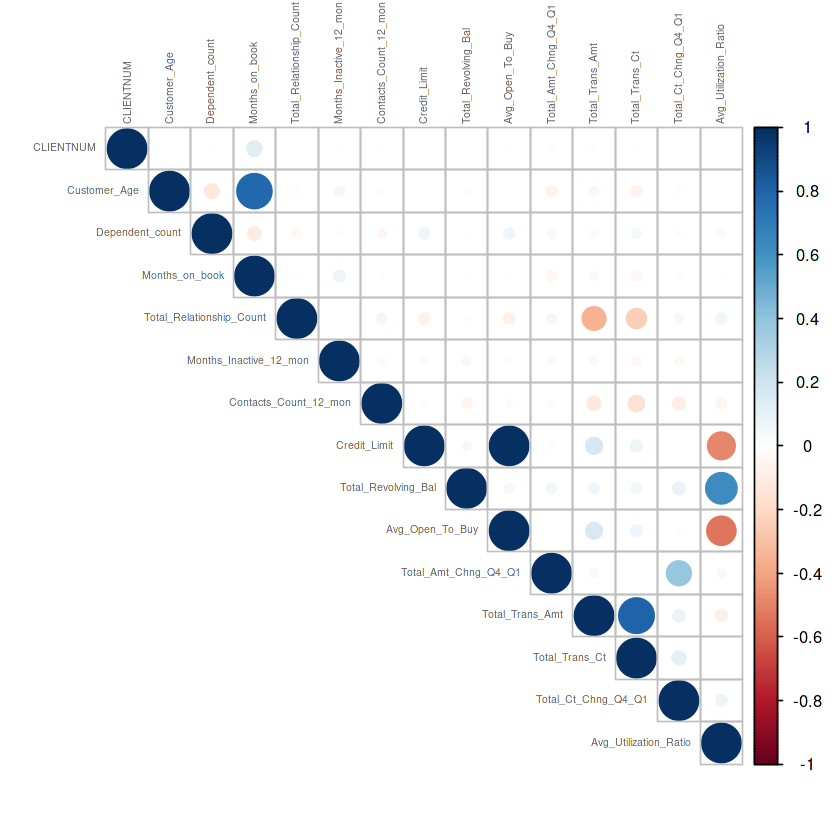

In [30]:
#check correlation of all numeric variables
df_num = select_if(df_clean,is.numeric)
df_num = data.frame(lapply(df_num, function(x) as.numeric(as.character(x))))
res=cor(df_num)
corrplot(res, type="upper", tl.col="#636363",tl.cex=0.5 )

**Removing variables which are highly coorelated since they can create bad models**

In [31]:
#drop Months_on_book,Total_Trans_Amt, Total_Amt_Chng_Q4_Q1, Avg_Utilization_Ratio
df1 = df_clean %>% select(-c(Months_on_book,Total_Trans_Amt, Total_Amt_Chng_Q4_Q1, Avg_Utilization_Ratio, Avg_Open_To_Buy))
dim(df1)

[1] 10127    16

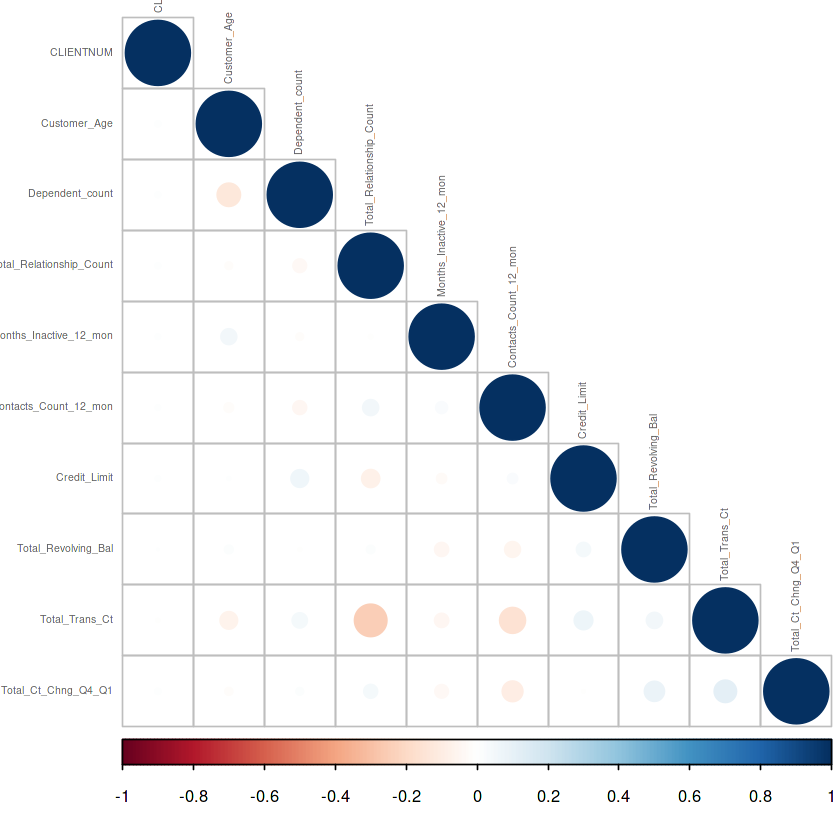

In [32]:
#check correlation after dropping variables
df1_num = select_if(df1,is.numeric)
df1_num = data.frame(lapply(df1_num, function(x) as.numeric(as.character(x))))
res2=cor(df1_num)
corrplot(res2, type="lower", tl.col="#636363",tl.cex=0.5 )

# Implementing ML model

Breaking the data into test and training datasets

In [33]:
trainIndex <- createDataPartition(df1$label, p = .75,list=FALSE)
training <- df1[trainIndex,]
testing <- df1[-trainIndex,]

Removing this variable since it is essentially ID number and it is not need for creating the model

In [34]:
training <- training %>% select(-c('CLIENTNUM'))
testing <- testing %>% select(-c('CLIENTNUM'))

# **Logistic Regression**

In [35]:
model <- glm(label~.,data = training,family = 'binomial')
summary(model)


Call:
glm(formula = label ~ ., family = "binomial", data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3501  -0.4081  -0.2058  -0.0879   3.8009  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    4.840e+00  4.335e-01  11.166  < 2e-16 ***
Customer_Age                  -5.152e-03  5.137e-03  -1.003 0.315917    
GenderM                       -6.497e-01  1.617e-01  -4.017 5.90e-05 ***
Dependent_count                1.401e-01  3.286e-02   4.264 2.00e-05 ***
Education_LevelUneducated      5.158e-02  1.544e-01   0.334 0.738274    
Education_LevelHigh School     1.309e-02  1.422e-01   0.092 0.926679    
Education_LevelCollege        -3.724e-02  1.703e-01  -0.219 0.826942    
Education_LevelGraduate       -1.210e-01  1.328e-01  -0.911 0.362120    
Education_LevelPost-Graduate   2.164e-01  2.086e-01   1.037 0.299591    
Education_LevelDoctorate       2.766e-01  2.114e-01   1.309 0.190645   

Above model shows that :

* Male gender has 0.7 log odds lesser chance of attrition
* Lower Customer Age has 0.3 log odds lesser change of attrition
* Higher education is associated with greater attrition
* For one unit increase in dependent count , the log odds of custoemr churning by 0.9
* Versus the Blue card, Silver has log odds of customer churning by 0.7
* 


In [36]:
anova(model, test= "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,7595,6698.139,NA
Customer_Age,1,1.475955,7594,6696.663,2.244086e-01
Gender,1,5.801946,7593,6690.861,1.600845e-02
Dependent_count,1,5.511182,7592,6685.349,1.889528e-02
Education_Level,6,10.281625,7586,6675.068,1.132823e-01
Marital_Status,3,5.787080,7583,6669.281,1.224415e-01
Income_Category,5,9.037060,7578,6660.244,1.075950e-01
Card_Category,3,1.141948,7575,6659.102,7.669585e-01
Total_Relationship_Count,1,171.967917,7574,6487.134,2.750222e-39


**Contextualising the most important variables for this model**

In [37]:
importance <-varImp(model,scale = FALSE)
importance %>% arrange(desc(Overall))

,Overall
,<dbl>
Total_Trans_Ct,26.73539561
Total_Relationship_Count,17.33868560
Total_Revolving_Bal,17.33031930
Total_Ct_Chng_Q4_Q1,14.31700840
Months_Inactive_12_mon,11.59121663
Contacts_Count_12_mon,10.97796708
Dependent_count,4.26435191
GenderM,4.01685772
Card_CategorySilver,3.94789901


**Creating a confusion Matrix**

In [38]:
prob=predict(model,testing,type="response")
prob1=rep(0,2531)
prob1[prob>0.2]=1
cmlr = confusionMatrix(as.factor(prob1), testing$label, positive="1")
cmlr

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1852   82
         1  273  324
                                         
               Accuracy : 0.8597         
                 95% CI : (0.8456, 0.873)
    No Information Rate : 0.8396         
    P-Value [Acc > NIR] : 0.002738       
                                         
                  Kappa : 0.5625         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.7980         
            Specificity : 0.8715         
         Pos Pred Value : 0.5427         
         Neg Pred Value : 0.9576         
             Prevalence : 0.1604         
         Detection Rate : 0.1280         
   Detection Prevalence : 0.2359         
      Balanced Accuracy : 0.8348         
                                         
       'Positive' Class : 1              
                                         

**Finding the Recall value**

In [39]:
recall_lr <- 309/(97 + 309) * 100
recall_lr

round(cmlr$byClass["F1"], 4)

[1] 76.10837

F1 
0.6461

# ROC curve 

Setting levels: control = 0, case = 1

Setting direction: controls < cases



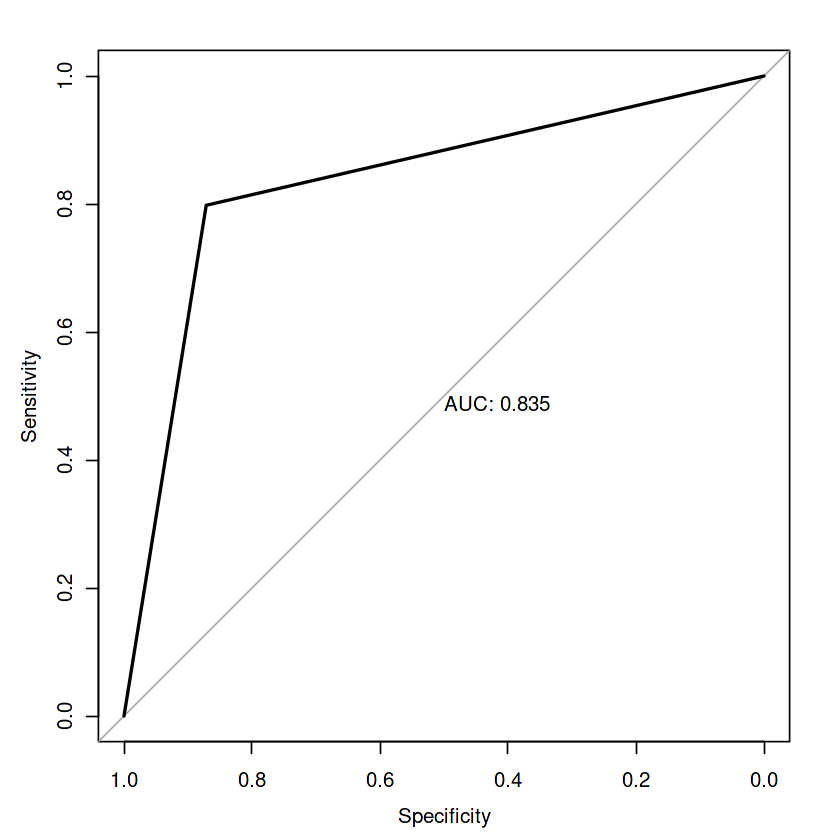

In [40]:
roc_lr2 <- roc(testing$label, prob1, plot=TRUE, print.auc=TRUE)

# **Decision Tree**

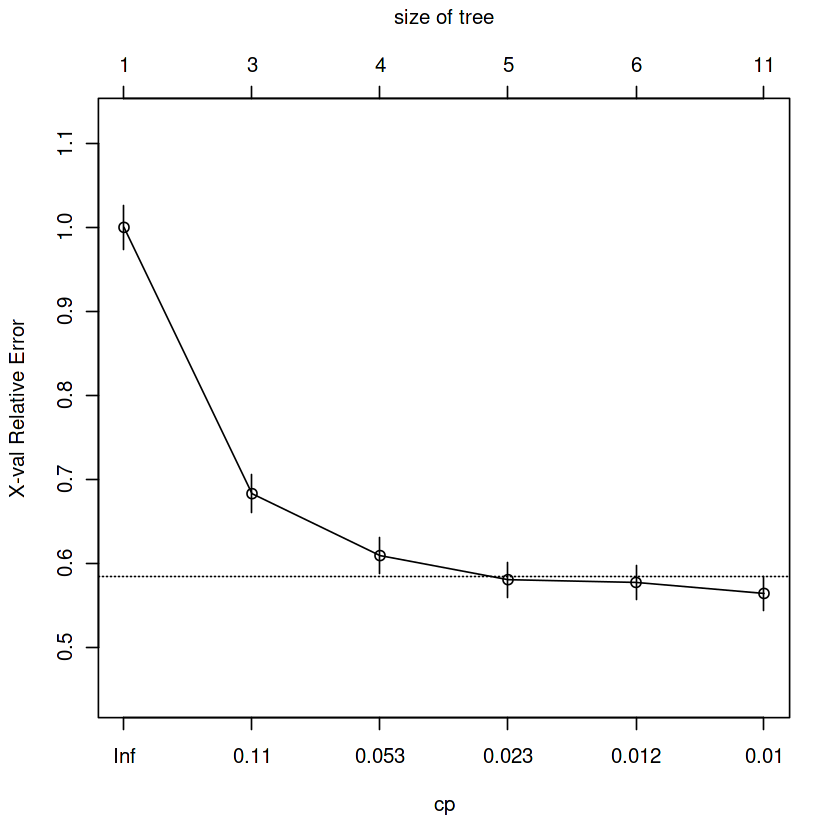

In [41]:
mt = rpart(label ~., data = training, method = "class")
plotcp(mt)

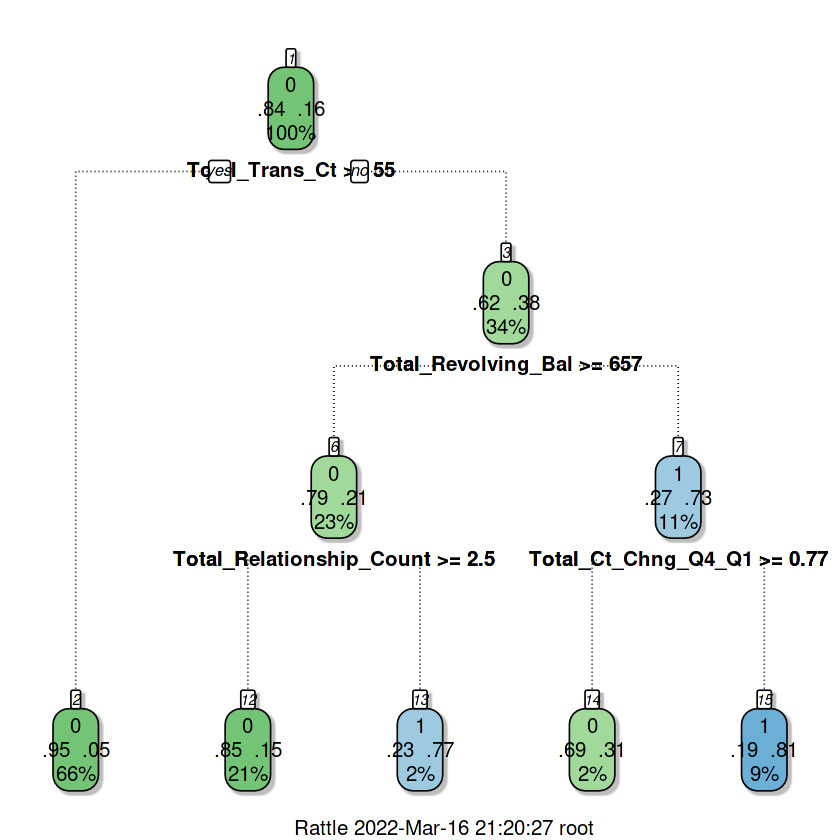

In [42]:
mt_prune = prune(mt,cp=0.036)
fancyRpartPlot(mt_prune)

In [43]:
printcp(mt_prune)


Classification tree:
rpart(formula = label ~ ., data = training, method = "class")

Variables actually used in tree construction:
[1] Total_Ct_Chng_Q4_Q1      Total_Relationship_Count Total_Revolving_Bal     
[4] Total_Trans_Ct          

Root node error: 1221/7596 = 0.16074

n= 7596 

        CP nsplit rel error  xerror     xstd
1 0.160115      0   1.00000 1.00000 0.026217
2 0.072072      2   0.67977 0.68305 0.022316
3 0.039312      3   0.60770 0.60934 0.021217
4 0.036000      4   0.56839 0.58067 0.020765


In [44]:
dt_imp <- mt_prune$variable.importance
df <- as.data.frame(dt_imp)
df

,dt_imp
,<dbl>
Total_Trans_Ct,370.163120
Total_Revolving_Bal,314.420816
Total_Ct_Chng_Q4_Q1,162.002962
Total_Relationship_Count,128.204169
Credit_Limit,53.148692
Contacts_Count_12_mon,7.870064
Customer_Age,2.000180
Months_Inactive_12_mon,1.871433


In [45]:
tree.p = predict(mt_prune, testing, type = "class")
cmt = confusionMatrix(tree.p, testing$label, positive ="1")
cmt

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2056  168
         1   69  238
                                          
               Accuracy : 0.9064          
                 95% CI : (0.8943, 0.9174)
    No Information Rate : 0.8396          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6143          
                                          
 Mcnemar's Test P-Value : 1.943e-10       
                                          
            Sensitivity : 0.58621         
            Specificity : 0.96753         
         Pos Pred Value : 0.77524         
         Neg Pred Value : 0.92446         
             Prevalence : 0.16041         
         Detection Rate : 0.09403         
   Detection Prevalence : 0.12130         
      Balanced Accuracy : 0.77687         
                                          
       'Positive' Class : 1               
                        

Recall - 63%

In [46]:
round(cmt$byClass["F1"], 4)

F1 
0.6676

Setting levels: control = 0, case = 1

Setting direction: controls < cases



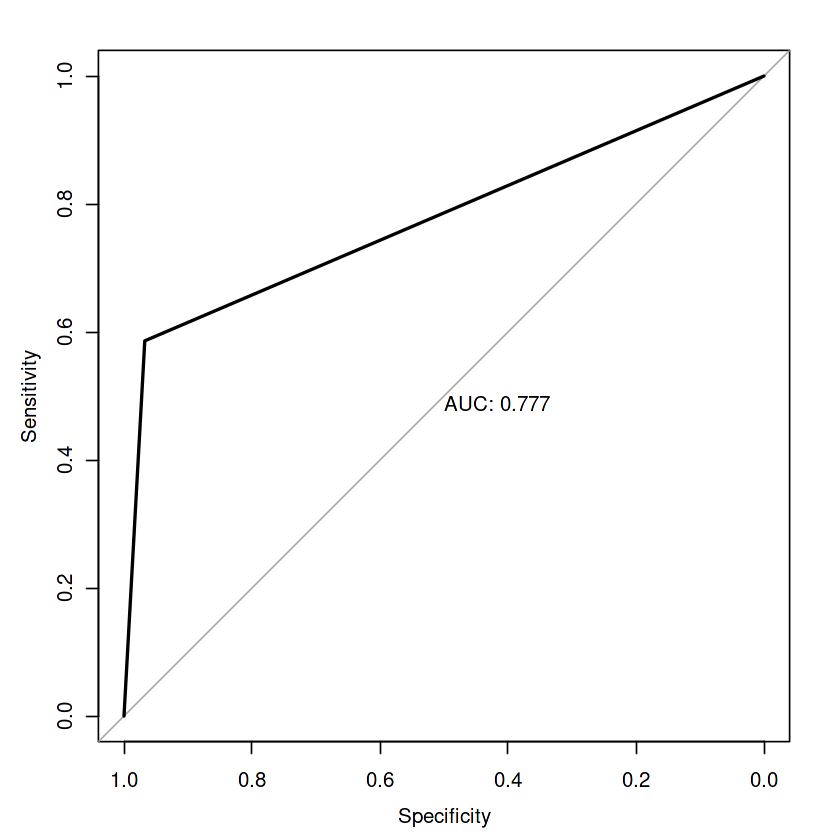

In [47]:
testing$tp1= tree.p
roc_t= roc(response= testing$label, predictor = factor(testing$tp1, ordered=TRUE), plot=TRUE, print.auc=TRUE)

# **Random Forest **

In [48]:
trControl <- trainControl(method = "cv",
    number = 10,
    search = "grid")

In [49]:
set.seed(1234)
rf1 = train(label ~ .,data = training,method="rf",metric ="Accuracy",trControl = trControl)
print(rf1)

Random Forest 

7596 samples
  14 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 6836, 6837, 6836, 6836, 6836, 6836, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8965264  0.4901870
  14    0.9312790  0.7243863
  27    0.9286469  0.7137341

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 14.


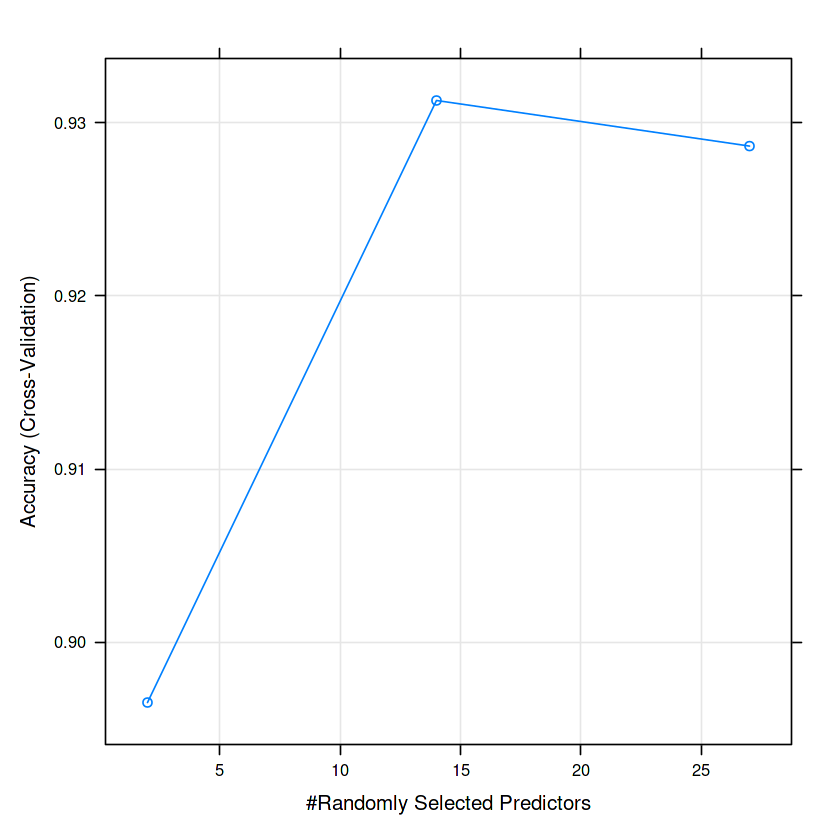

In [50]:
plot(rf1)

In [51]:
varImp(rf1)

rf variable importance

  only 20 most important variables shown (out of 27)

                              Overall
Total_Trans_Ct                100.000
Total_Revolving_Bal            81.637
Total_Ct_Chng_Q4_Q1            67.999
Total_Relationship_Count       44.098
Credit_Limit                   29.883
Customer_Age                   23.875
Contacts_Count_12_mon          17.160
Months_Inactive_12_mon         16.835
Dependent_count                 9.683
GenderM                         4.703
Marital_StatusMarried           3.665
Education_LevelGraduate         2.482
Marital_StatusSingle            2.464
Income_CategoryLess than $40K   2.293
Income_Category$40K - $60K      2.109
Education_LevelHigh School      2.030
Education_LevelUneducated       2.014
Income_Category$80K - $120K     1.892
Income_Category$60K - $80K      1.862
Education_LevelCollege          1.638

In [52]:
rfpred = predict(rf1, testing)
cmrf = confusionMatrix(rfpred, testing$label,positive="1")
cmrf

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2069  123
         1   56  283
                                         
               Accuracy : 0.9293         
                 95% CI : (0.9186, 0.939)
    No Information Rate : 0.8396         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7187         
                                         
 Mcnemar's Test P-Value : 8.095e-07      
                                         
            Sensitivity : 0.6970         
            Specificity : 0.9736         
         Pos Pred Value : 0.8348         
         Neg Pred Value : 0.9439         
             Prevalence : 0.1604         
         Detection Rate : 0.1118         
   Detection Prevalence : 0.1339         
      Balanced Accuracy : 0.8353         
                                         
       'Positive' Class : 1              
                                         

Recall : 67% : 276/(276+130)

In [53]:
round(cmrf$byClass["F1"], 4)

F1 
0.7597

Setting levels: control = 0, case = 1

Setting direction: controls < cases



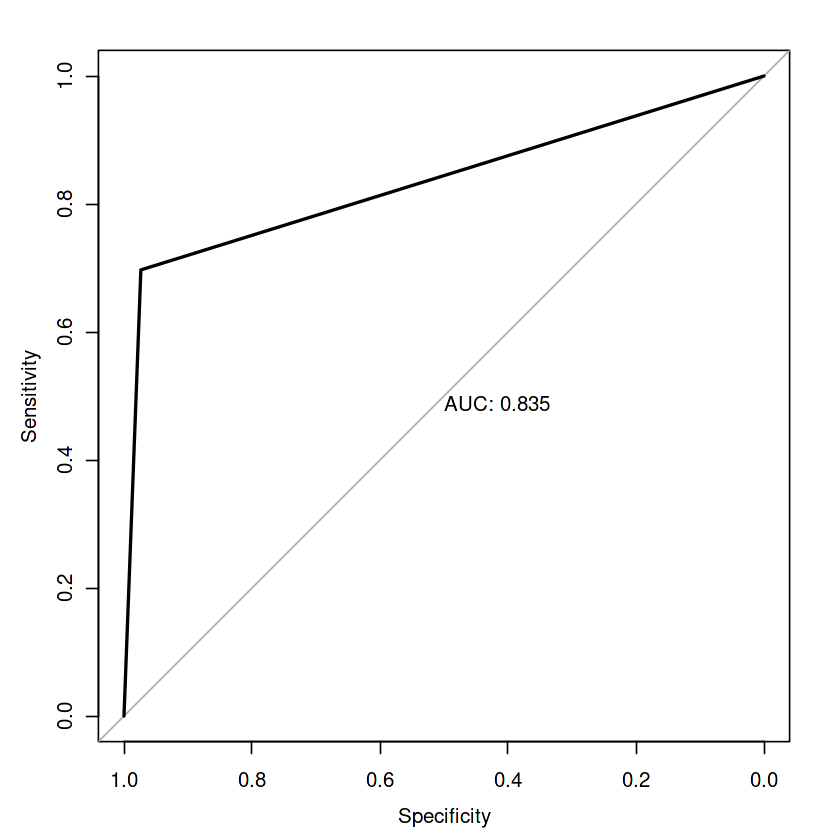

In [54]:
testing$rfp= rfpred
roc_rf <- roc(response= testing$label, predictor = factor(testing$rfp, ordered=TRUE), plot=TRUE, print.auc=TRUE)

Based on above Logistic Regression has the best AUC,F1,Recall rates compared to the rest